In [2]:
import numpy as np


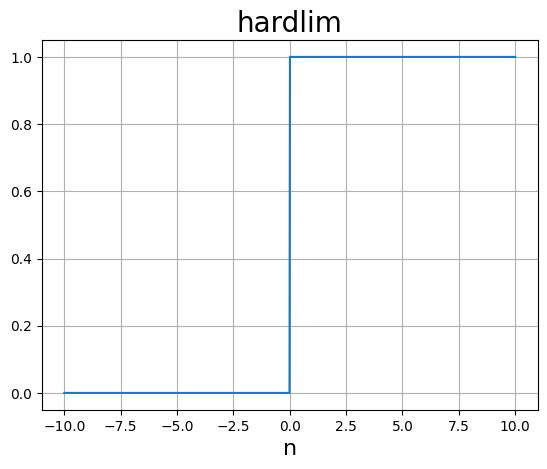

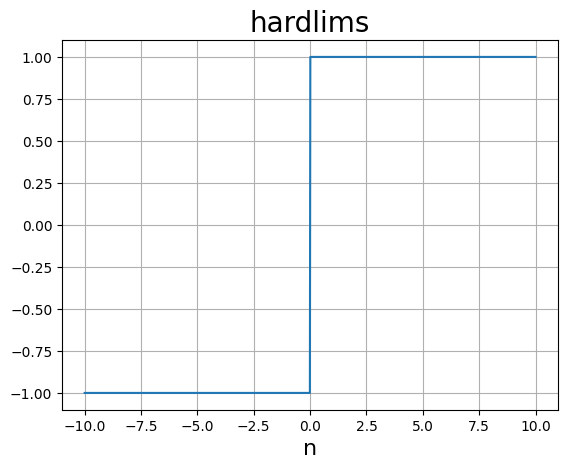

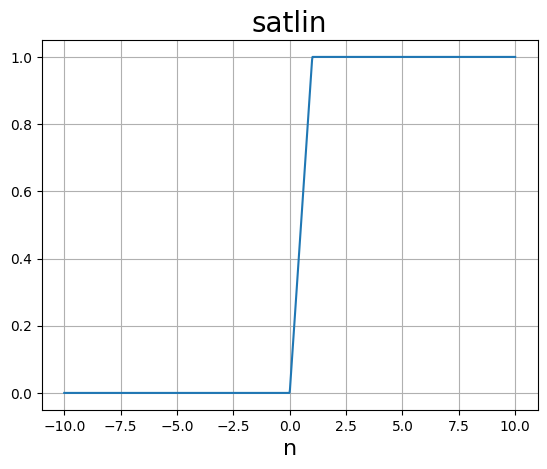

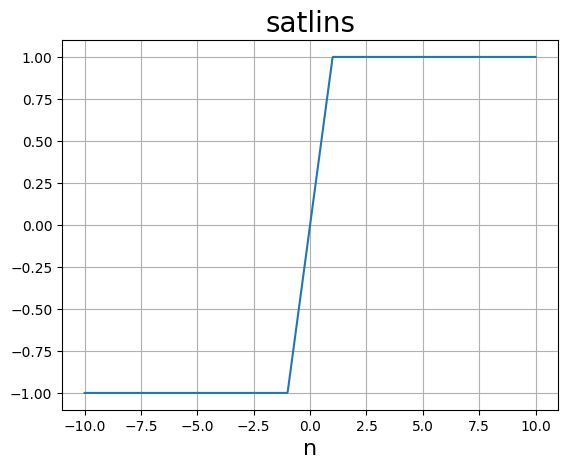

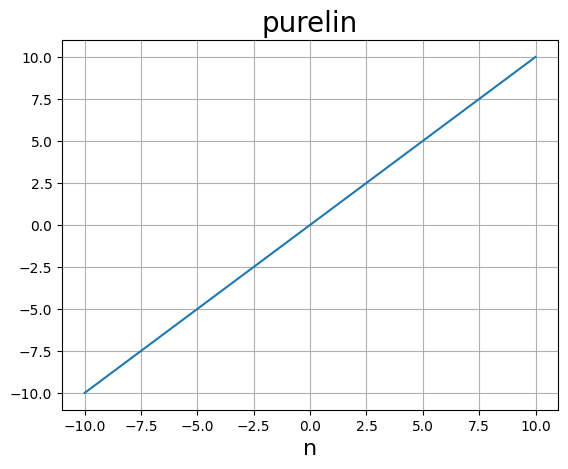

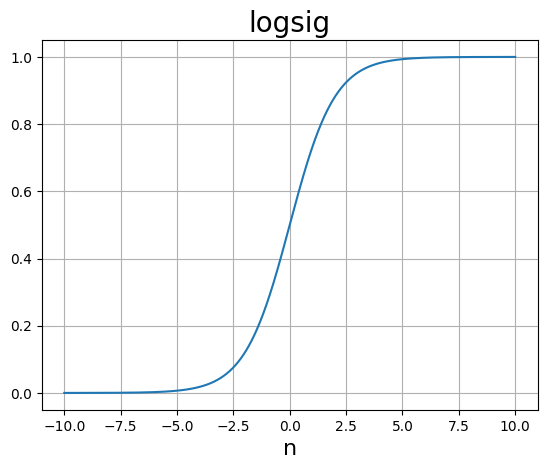

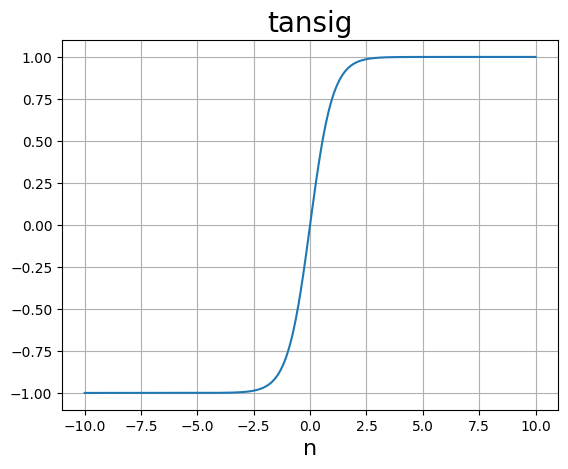

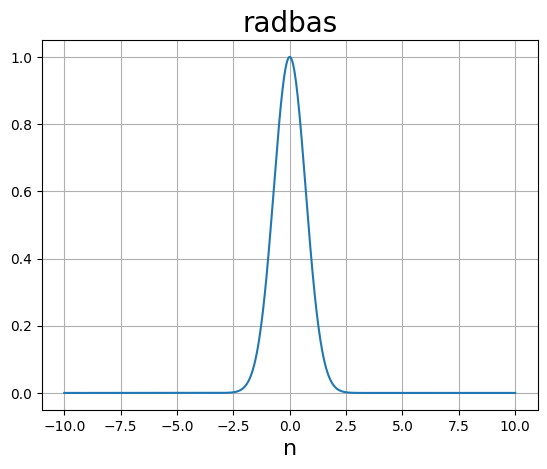

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def hardlim(n):
    # Funkcja perceptronowa y = 1 dla n>0 i 0 w przeciwnym przypadku
    if np.isscalar(n):
        if n<0:
            return 0
        elif n>=0:
            return 1
        else:
            return n
    else:
        y=np.copy(n)
        y[n<0]=0
        y[n>=0]=1
        return y
def hardlims(n, *b):
# Funkcja perceptronowa symetryczna y = 1 dla n>=0 i -1 w przeciwnym przypadku
    if not b:
        return np.sign(n)
    else:
        return np.sign(np.array(n) + b)[0][0]
def purelin(n, *b):
    # Funkcja liniowa y = n
    if not b:
        return n
    else:
        return (n + b * np.ones((np.size(n),1)))[0][0]
def satlin(n):
# Funkcja liniowa ograniczona y = n dla 0<n<=1 i 0 dla n<0 oraz 1 dla n>1
    if np.isscalar(n):
        if n<0:
            return 0
        elif n>1:
            return 1
        else:
            return n
    else:
        y=np.copy(n)
        y[n<0]=0
        y[n>1]=1
        return y
def satlins(n):
# Funkcja liniowa ograniczona y = n dla 0<n<=1 i 0 dla n<0 oraz 1 dla n>1
    if np.isscalar(n):
        if n<-1:
            return -1
        elif n>1:
            return 1
        else:
            return n
    else:
        y=np.copy(n)
        y[n<-1]=-1
        y[n>1]=1
        return y
    
def logsig(n, *b):
# Sigmoidalna funkcja unipolarna
    if not b:
        return 1 / (1 + np.exp(-n))
    else:
        return 1 / (1 + np.exp(-(np.array(n) + b)))[0][0]
def tansig(n, *b):
# Sigmoidalna funkcja bipolarna
    if not b:
        return np.tanh(np.array(n))
    else:
        return np.tanh(np.array(n)+b)
def radbas(n,beta=1,*b):
# Funkcja radialna
    if not b:
        return np.exp(-np.power(beta*n,2))
    else:
        return np.exp(-np.power(beta*(n+b),2))
nn_identifiers = ["hardlim", "hardlims", "satlin", "satlins",
"purelin", "logsig", "tansig", "radbas"]

def plot_threshold_fuctions(f):
    n = np.linspace(-10,10,1000)
    for f_ind in range(len(f)):
        y = globals()[f[f_ind]](n)
        plt.figure()
        plt.plot(n,y)
        plt.xlabel("n", fontsize = 16)
        plt.title(f[f_ind], fontsize = 20)
        plt.grid()
        plt.draw()
plot_threshold_fuctions(nn_identifiers)


In [4]:
w=np.array([.1, .4, -.3, .7])
x=np.array([range(1,5)])
b=.5
z=w.dot(x.T)+b
print("Metoda 1: łączne pobudzenie neuronu wynosi", z)


Metoda 1: łączne pobudzenie neuronu wynosi [3.3]


In [5]:
w = np.array([.1, .4, -.3, .7])
x = np.array([1, 2, 3, 4])
b = .5
z = np.sum(w*x) + b
print("Metoda 2: łączne pobudzenie neuronu wynosi", z)


Metoda 2: łączne pobudzenie neuronu wynosi 3.3


In [6]:
w = np.array([.1, .4, -.3, .7])
x = np.array([1, 2, 3, 4])
b = .5
z = 0
for i in range(len(x)):
    z += w[i]*x[i]
z += b
print("Metoda 3: łączne pobudzenie neuronu wynosi", z)

Metoda 3: łączne pobudzenie neuronu wynosi 3.3


In [7]:
w = np.array([.1, .4, -.3, .7])
x = np.array([1, 2, 3, 4])
b = .5
z = np.sum(np.multiply(w, x)) + b
print("Metoda 4: łączne pobudzenie neuronu wynosi", z)

Metoda 4: łączne pobudzenie neuronu wynosi 3.3


część III

In [8]:
w=np.array([.1, .4, -.3, .7])
x=np.array([range(1,5)])
b=.5
z=w.dot(x.T)+b
print("Metoda 1: łączne pobudzenie neuronu wynosi", z)

Metoda 1: łączne pobudzenie neuronu wynosi [3.3]


In [9]:
n=z
f = ["hardlim", "hardlims", "satlin", "satlins",
"purelin", "logsig", "tansig", "radbas"]
for f_ind in range(len(f)):
    y = globals()[f[f_ind]](n)
    print(f"n : {n} \t f : {f[f_ind]} \t y : {y}")

<class 'numpy.ndarray'>
n : [3.3] 	 f : hardlim 	 y : [1.]
n : [3.3] 	 f : hardlims 	 y : [1.]
n : [3.3] 	 f : satlin 	 y : [1.]
n : [3.3] 	 f : satlins 	 y : [1.]
n : [3.3] 	 f : purelin 	 y : [3.3]
n : [3.3] 	 f : logsig 	 y : [0.96442881]
n : [3.3] 	 f : tansig 	 y : [0.99728296]
n : [3.3] 	 f : radbas 	 y : [1.86437423e-05]


In [39]:
#model perceptronu gdzie baias jest w wektorze wag
class Neuron:
    def __init__(self, w, f_activation):
        self.w = w
        self.f_activation = f_activation
        w_1 = self.w[:-1]
        self.z = w_1.dot(x.T) + self.w[-1]
        
    def forward(self, x):
        return np.array(np.float64(self.f_activation(self.z)))

   




In [41]:
x= np.array([1, 2, 3, 4])   
w=np.array([.1, .4, -.3, .7, .5])


f = ["hardlim", "hardlims", "satlin", "satlins",
"purelin", "logsig", "tansig", "radbas"]
for f_ind in range(len(f)):
    n = Neuron(w, globals()[f[f_ind]])
    print(f"n : {n.z} \t f : {f[f_ind]} \t y : {n.forward(x)} \t type : {type(n.forward(x))}")
     

n : 3.3 	 f : hardlim 	 y : 1.0 	 type : <class 'numpy.ndarray'>
n : 3.3 	 f : hardlims 	 y : 1.0 	 type : <class 'numpy.ndarray'>
n : 3.3 	 f : satlin 	 y : 1.0 	 type : <class 'numpy.ndarray'>
n : 3.3 	 f : satlins 	 y : 1.0 	 type : <class 'numpy.ndarray'>
n : 3.3 	 f : purelin 	 y : 3.3 	 type : <class 'numpy.ndarray'>
n : 3.3 	 f : logsig 	 y : 0.9644288107273639 	 type : <class 'numpy.ndarray'>
n : 3.3 	 f : tansig 	 y : 0.9972829600991421 	 type : <class 'numpy.ndarray'>
n : 3.3 	 f : radbas 	 y : 1.864374233151685e-05 	 type : <class 'numpy.ndarray'>
